# Hands-On Audio Processing

IF4021 - Multimedia Information Processing 

Nama: Bagas Andreanto 

NIM: 122140017 

Link Github Repository: https://github.com/bagas017/Hands-on_Pemrosesan_Audio 

---

**Deskripsi Tugas** Tugas ini dirancang untuk menguji pemahaman mahasiswa terhadap konsep-konsep fundamental dalam pemrosesan audio digital termasuk manipulasi sinyal audio, filtering, pitch shifting, normalisasi, dan teknik remix audio. Mahasiswa diharapkan dapat menerapkan teori yang telah dipelajari dalam praktik langsung menggunakan Python dan pustaka pemrosesan audio.


#### Library yang digunakan:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import scipy
import scipy.signal
from IPython.display import Audio, HTML, display
import os

print("Library yang digunakan:")
print(f"NumPy       : {np.__version__}")
print(f"Matplotlib  : {plt.matplotlib.__version__}")
print(f"Librosa     : {librosa.__version__}")
print(f"SciPy       : {scipy.__version__}")
print(f"SoundFile   : {sf.__version__}")

Library yang digunakan:
NumPy       : 2.2.6
Matplotlib  : 3.10.7
Librosa     : 0.11.0
SciPy       : 1.15.3
SoundFile   : 0.13.1


---

### Soal 1: Rekaman dan Analisis Suara Multi-Level



In [20]:
Path_Soal_Audio1 = os.path.join(os.getcwd(), 'data', 'Soal1_Audio.wav')

if os.path.exists(Path_Soal_Audio1):
 y, sr = librosa.load(Path_Soal_Audio1, sr=None)
 source_info = f"Lokasi File: {Path_Soal_Audio1}"


print(source_info)
print(f"Shape: {y.shape}")
print(f"Sample rate: {sr:,} Hz")
print(f"Durasi: {len(y)/sr:.2f} detik")


Lokasi File: c:\Users\Pongo\OneDrive\Desktop\Git-Upload\Tugas_Multimedia\Hands-on_Pemrosesan_Audio\data\Soal1_Audio.wav
Shape: (1203200,)
Sample rate: 48,000 Hz
Durasi: 25.07 detik


##### Visualisasi Waveform dan Spectrogram

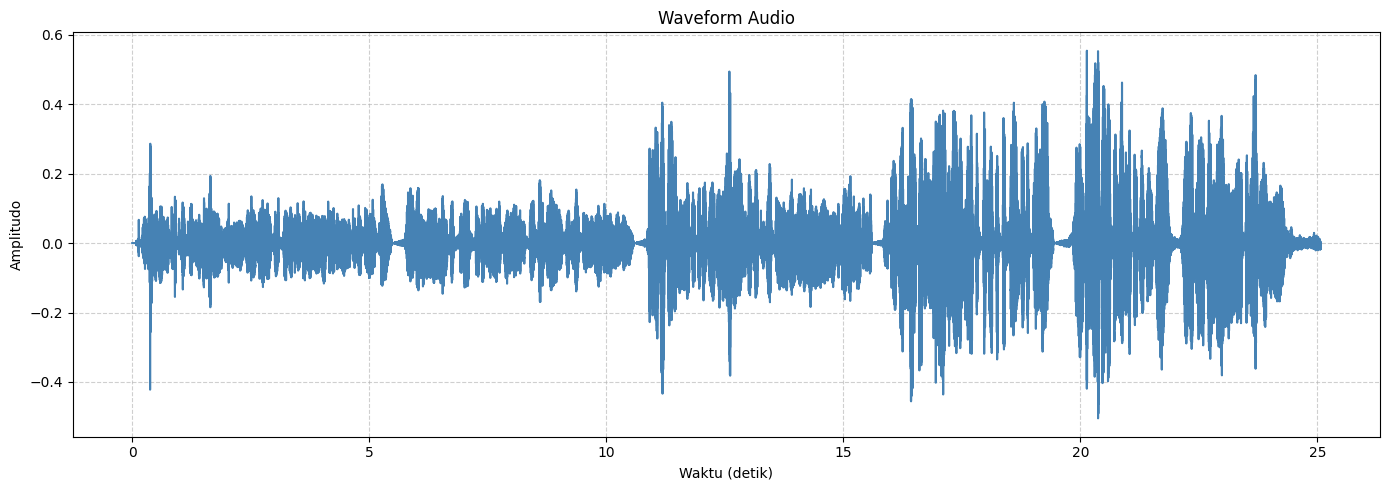

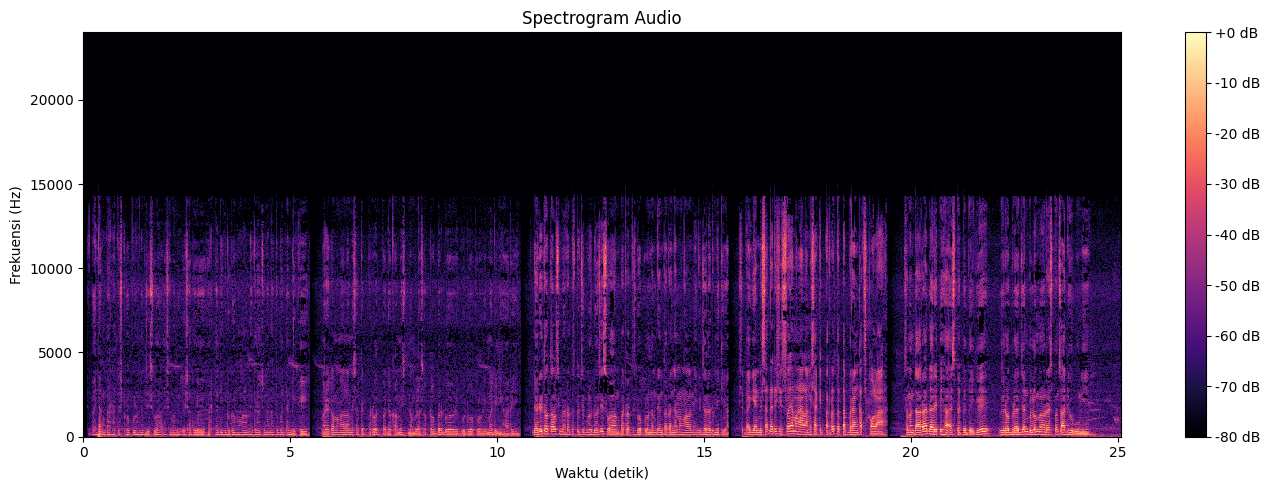

Audio Player:


In [21]:
# Plot waveform
duration = len(y) / sr
time = np.linspace(0, duration, len(y))

plt.figure(figsize=(14, 5))
plt.plot(time, y, color='steelblue')
plt.title('Waveform Audio')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Audio')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.tight_layout()
plt.show()

# Audio player
print("Audio Player:")
display(Audio(y, rate=sr))



**#### Penjelasan:**

Dapat dilihat pada waveform, untuk di detik awal 0-5 detik memiliki level suara yang sedikit rendah hal ini karena rekaman dilakukan dengan cara berbisik. Kemudian pada detik ke 5-10 suara mulai meningkat karena rekaman dilakukan dengan cara berbicara normal. Selanjutnya pada detik ke 10-15 suara mulai meningkat lagi karena rekaman dilakukan dengan cara berbicara dengan volume yang lebih keras. Pada detik ke 15-20 gelombang sedikit lebih rapat (frekuensi naik) karena audio direkam dengan suara cempreng. Dan pada detik ke 20-25 amplitudo naik karena suara direkam dengan cara berteriak.

 

**Kenapa bentuk visualisasi dari suara berbisik dan normal terlihat mirip?**

Mungkin karena saya terlalu dekat dalam merekam suara berbisik, disebabkan situasi di kos tidak kondusif untuk merekam suara berbisik. Sehingga visualisasi yang dihasilkan terlihat mirip meskipun jika di dengar secara langsung suara berbisik akan terdengar sedikit lebih pelan dibandingkan suara normal.



#### Resampling Audio

Sample rate asli: 48000
Sample rate baru: 16000


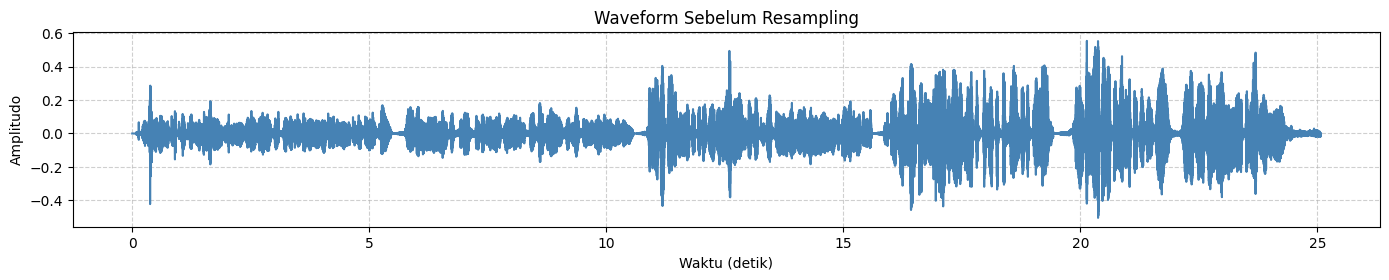

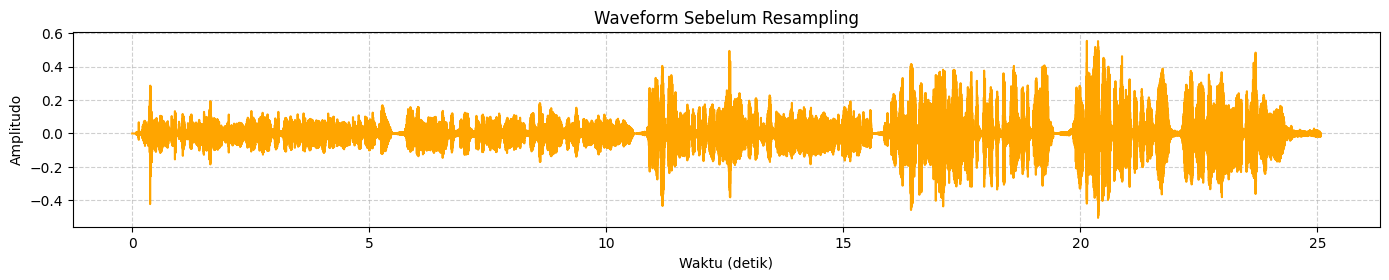

Audio Player Sebelum Resampling:


Audio Player Sesudah Resampling:


In [28]:
# Resampling Audio
print("Sample rate asli:", sr)

# Target resampling 16000 Hz
target_sr = 16000
y_resampled = librosa.resample(y=y, orig_sr=sr, target_sr=target_sr)
print("Sample rate baru:", target_sr)

# Menyimpan output resampling
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)
output_filename = 'Soal1_Audio_Resampled.wav'
output_path = os.path.join(output_dir, output_filename)


sf.write(output_path, y_resampled, target_sr)

# Perbandingan waveform sebelum dan sesudah resampling

# Waveform sebelum before
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
plt.plot(time, y, color='steelblue')
plt.title('Waveform Sebelum Resampling')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Waveform sesudah after
Path_Output_Resampled = os.path.join(os.getcwd(), 'output', 'Soal1_Audio_Resampled.wav')

if os.path.exists(Path_Output_Resampled):
    y_resampled, sr_resampled = librosa.load(Path_Output_Resampled, sr=None)
    duration_resampled = len(y_resampled) / sr_resampled
    time_resampled = np.linspace(0, duration_resampled, len(y_resampled))

plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
plt.plot(time, y, color='orange')
plt.title('Waveform Sebelum Resampling')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Perbandingan Audio Player
print("Audio Player Sebelum Resampling:")
display(Audio(y, rate=sr))

print("Audio Player Sesudah Resampling:")
display(Audio(y_resampled, rate=sr_resampled))

#### Penjelasan